# Fake news Detection

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Plot Confusion Matrix

In [2]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Dataset

In [4]:
df_fake = pd.read_csv("Fake_News.csv")
df_true = pd.read_csv("True_News.csv")

In [5]:
df_fake.head(7)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"


In [6]:
df_true.head(7)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"


### Insert Class Column

In [7]:
df_fake["class"] = 0
df_true["class"] = 1

In [8]:
#Removing last 10 rows from both the dataset, for manual testing
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

### Manual Test Merging Fake and True News Dataset

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

c:\users\ratedrakash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ratedrakash\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_fake_manual_testing.head(7)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0


In [15]:
df_true_manual_testing.head(7)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1


In [16]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("Manual_Testing.csv")

## Main Dataset Merging Fake and True News Dataset

In [17]:
df_merge = pd.concat([df_fake, df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [18]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
df = df_merge.drop(["title", "subject", "date"], axis = 1)

In [20]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [22]:
#Suffle Dataframe
df = df.sample(frac = 1)

In [23]:
df.head()

,text,class
8811,As the Department of Justice prepared to inves...,0
4460,WASHINGTON (Reuters) - U.S. President Donald T...,1
21091,So a woman straps an apparatus to her person...,0
22884,Tune in to the Alternate Current Radio Network...,0
11687,The principal of a fancy New York City private...,0


In [24]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [25]:
df.columns

Index(['text', 'class'], dtype='object')

In [26]:
df.head()

,text,class
0,As the Department of Justice prepared to inves...,0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,So a woman straps an apparatus to her person...,0
3,Tune in to the Alternate Current Radio Network...,0
4,The principal of a fancy New York City private...,0


# Data Pre-processing

In [27]:
def pre_process(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [28]:
df["text"] = df["text"].apply(pre_process)

In [29]:
x = df["text"]
y = df["class"]

In [30]:
#Train and Test Dataset Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Text to Vector

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
LR.score(xv_test, y_test)

0.9866310160427807

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5892
           1       0.98      0.99      0.99      5328

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Accuracy:   0.987
Confusion matrix, without normalization


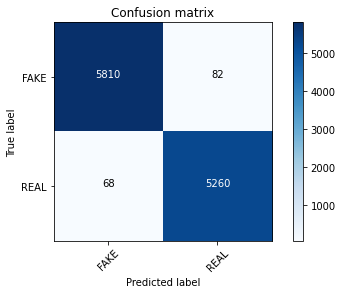

In [38]:
pred = LR.predict(xv_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## 2. Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = DT.predict(xv_test)

In [42]:
DT.score(xv_test, y_test)

0.9958110516934047

In [43]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5892
           1       1.00      1.00      1.00      5328

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Accuracy:   0.996
Confusion matrix, without normalization


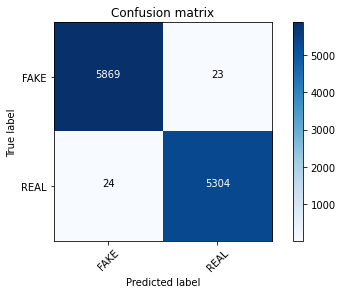

In [44]:
pred = DT.predict(xv_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## 3. Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [47]:
pred_rfc = RFC.predict(xv_test)

In [48]:
RFC.score(xv_test, y_test)

0.9910873440285205

In [49]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5892
           1       0.99      0.99      0.99      5328

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Accuracy:   0.991
Confusion matrix, without normalization


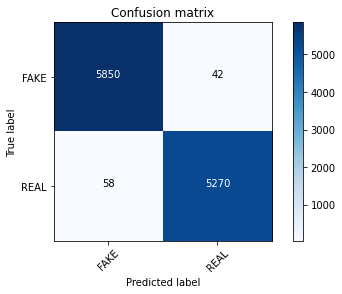

In [63]:
pred = RFC.predict(xv_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# 4. Passive Aggressive Classifier

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [59]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(xv_train, y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred = pac.predict(xv_test)
score=pac.score(xv_test,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.6%


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5892
           1       1.00      1.00      1.00      5328

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Accuracy:   0.996
Confusion matrix, without normalization


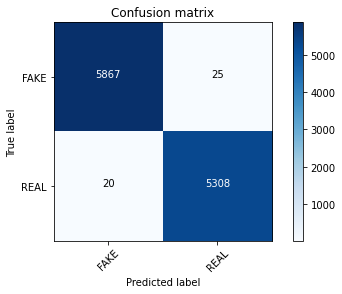

In [64]:
pred = pac.predict(xv_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Model Testing With Manual Entry

In [61]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(pre_process) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_PAC = pac.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [62]:
news = str(input())
manual_testing(news)

COPENHAGEN (Reuters) - Danish police said on Tuesday the size of a headless female torso found on the sea s edge in Copenhagen suggested it could be that of a Swedish journalist who died after taking a submarine ride with the vessel s Danish inventor. Police said divers were still searching the area and they were investigating reports of other body parts that may have been spotted in Copenhagen harbor. Danish inventor Peter Madsen has been charged with killing Kim Wall, a Swedish journalist, in his home-made submarine.   We re dealing with a torso where arms, legs and head were cut off deliberately. The length of the torso doesn t speak against it being Kim Wall, but we still don t know,  Copenhagen police spokesman Jens Moller said in a video statement. Madsen told a court she had died in an accident on board the submarine and that he had buried her at sea, changing his earlier statement that he dropped her off alive in Copenhagen. Police are conducting DNA tests to identify the torso

In [53]:
#Test Dataset

#COPENHAGEN (Reuters) - Danish police said on Tuesday the size of a headless female torso found on the sea s edge in Copenhagen suggested it could be that of a Swedish journalist who died after taking a submarine ride with the vessel s Danish inventor. Police said divers were still searching the area and they were investigating reports of other body parts that may have been spotted in Copenhagen harbor. Danish inventor Peter Madsen has been charged with killing Kim Wall, a Swedish journalist, in his home-made submarine.   We re dealing with a torso where arms, legs and head were cut off deliberately. The length of the torso doesn t speak against it being Kim Wall, but we still don t know,  Copenhagen police spokesman Jens Moller said in a video statement. Madsen told a court she had died in an accident on board the submarine and that he had buried her at sea, changing his earlier statement that he dropped her off alive in Copenhagen. Police are conducting DNA tests to identify the torso - found on Monday by a passing cyclist - and the results are due Wednesday morning, Moller said. The bizarre case has dominated Danish and Swedish media, and drawn interest from around the world. Madsen has been charged with the manslaughter of Wall, who has been missing since he took her out to sea in his 17-metre (56 feet) submarine on Aug. 10. He denies the charge. He was rescued a day later after his UC3 Nautilus sank in the narrow strait between Denmark and Sweden. Police found nobody else in the wreck. Madsen, an entrepreneur, artist, submarine builder and aerospace engineer, went before a judge on Saturday for preliminary questioning. The case is closed to the public in order to protect further investigations, police said.
#Not Fake News

In [54]:
#Test Dataset

#21st Century Wire says It s a familiar theme. Whenever there is a dispute or a change of law, and two tribes go to war, there is normally only one real winner after the tribulation  the lawyers. Ars TechnicaIn late 2013, Yahoo was hit with six lawsuits over its practice of using automated scans of e-mail to produce targeted ads. The cases, which were consolidated in federal court, all argued that the privacy rights of non-Yahoo users, who  did not consent to Yahoo s interception and scanning of their emails,  were being violated by a multi-billion dollar company.Now, lawyers representing the plaintiffs are singing a different tune. Last week, they asked US District Judge Lucy Koh to accept a proposed settlement (PDF). Under the proposal, the massive class of non-Yahoo users won t get any payment, but the class lawyers at Girard Gibbs and Kaplan Fox intend to ask for up to $4 million in fees. (The ultimate amount of fees will be up to the judge, but Yahoo has agreed not to oppose any fee request up to $4 million.)While users won t get any payment, Yahoo will change how it handles user e-mails but it isn t the change that the plaintiffs attorneys were originally asking for. Yahoo won t stop scanning e-mails. Instead, the company has agreed to make a technical change to when it scans e-mails. In the settlement (PDF), Yahoo has agreed that e-mail content will be  only sent to servers for analysis for advertising purposes after a Yahoo Mail user can access the email in his or her inbox. The settlement deal looks pretty similar to what Yahoo had argued it did in the first place Continue this story at Ars TechnicaREAD MORE NSA NEWS AT: 21st Century Wire NSA Files
#Fake News